# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import urllib.parse
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    units = "imperial"
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bulayevo
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | saint-francois
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | mbandaka
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | moapa valley
Processing Record 9 of Set 1 | stettler
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | taupo
Processing Record 12 of Set 1 | afaahiti
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | sanya
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | gubkinskiy
Processing Record 22 of Set 1 | m

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bulayevo,54.9056,70.4439,57.81,68,100,13.44,KZ,1693708419
1,bethel,41.3712,-73.4140,68.65,80,0,5.75,US,1693708401
2,saint-francois,46.4154,3.9054,58.44,88,0,3.44,FR,1693708420
3,port alfred,-33.5906,26.8910,59.85,69,100,6.40,ZA,1693708420
4,papatowai,-46.5619,169.4708,48.18,87,100,4.54,NZ,1693708420


In [55]:
# Create the "output_data" directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the filename for the CSV file
csv_filename = os.path.join(output_directory, "cities.csv")

# Export the DataFrame to the CSV file
city_data_df.to_csv(csv_filename, index_label="City_ID")

print(f"Data exported to {csv_filename}")


#I had to use chatgpt to perfect this cell and make it run, was having some issues

Data exported to output_data\cities.csv


In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bulayevo,54.9056,70.4439,57.81,68,100,13.44,KZ,1693708419
1,bethel,41.3712,-73.4140,68.65,80,0,5.75,US,1693708401
2,saint-francois,46.4154,3.9054,58.44,88,0,3.44,FR,1693708420
3,port alfred,-33.5906,26.8910,59.85,69,100,6.40,ZA,1693708420
4,papatowai,-46.5619,169.4708,48.18,87,100,4.54,NZ,1693708420


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

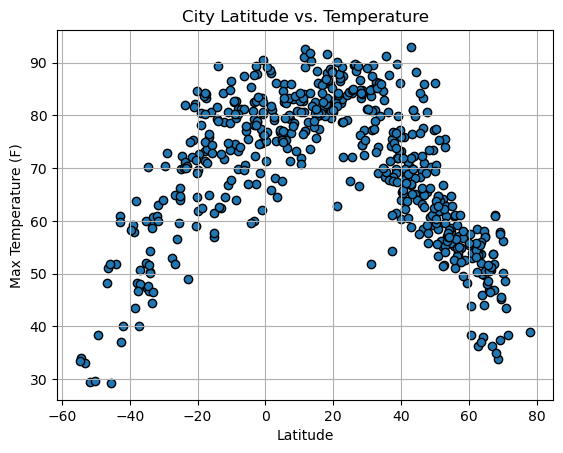

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

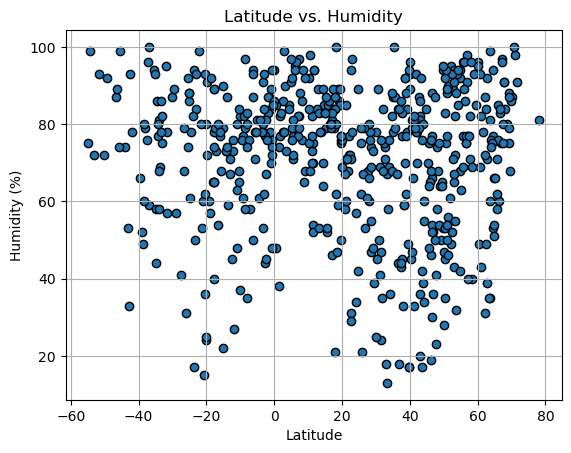

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

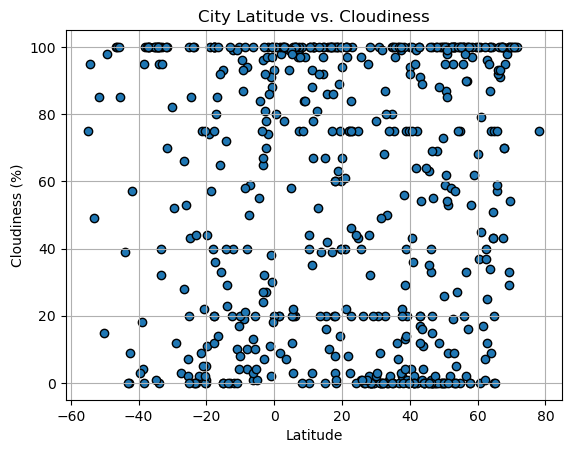

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

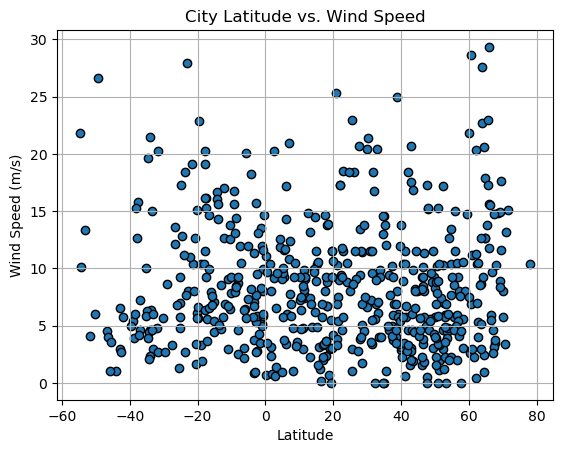

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bulayevo,54.9056,70.4439,57.81,68,100,13.44,KZ,1693708419
1,bethel,41.3712,-73.4140,68.65,80,0,5.75,US,1693708401
2,saint-francois,46.4154,3.9054,58.44,88,0,3.44,FR,1693708420
5,mbandaka,0.0487,18.2603,71.26,94,93,0.65,CD,1693708421
7,moapa valley,36.5805,-114.4703,87.69,44,7,9.46,US,1693708422


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port alfred,-33.5906,26.8910,59.85,69,100,6.40,ZA,1693708420
4,papatowai,-46.5619,169.4708,48.18,87,100,4.54,NZ,1693708420
6,puerto natales,-51.7236,-72.4875,29.50,93,85,4.09,CL,1693708422
10,taupo,-38.6833,176.0833,57.81,49,4,3.91,NZ,1693708423
11,afaahiti,-17.7500,-149.2833,73.27,89,100,19.13,PF,1693708423


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7889633286506222


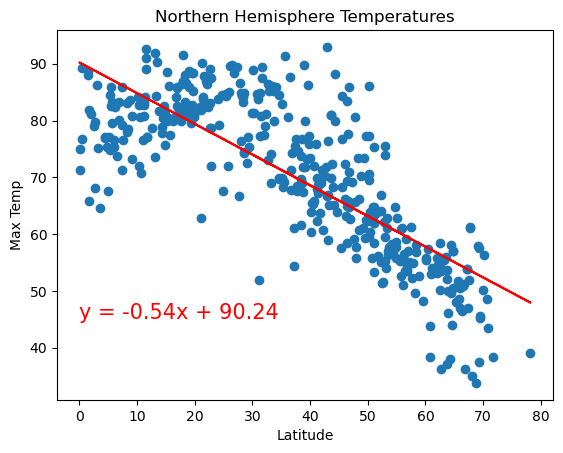

In [64]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,45,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.8020274153201802


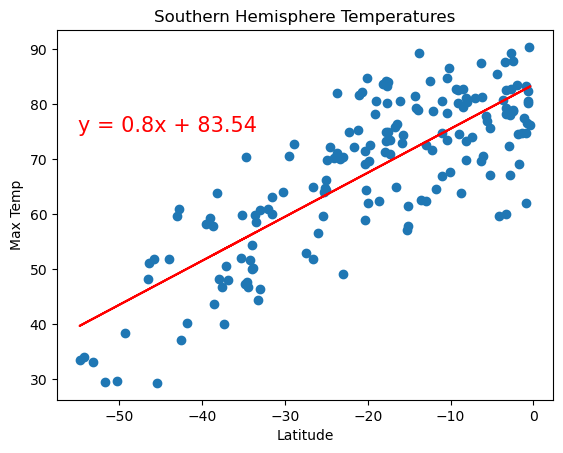

In [65]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,75,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The data shows the relation between latitude and maxiumum tempature. As you move farther away from the equator towards the north pole the tempatures decrease. Same with the south, if you head south away from the equator the tempature decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07350334489766353


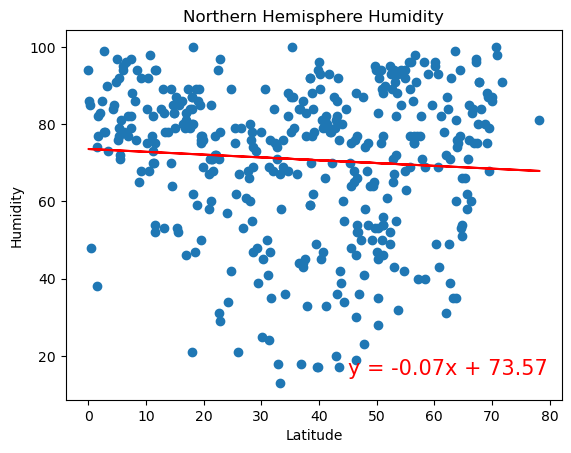

In [66]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")
#print(f"The p-value is: {pe_p}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(45,15,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.05707171364864239


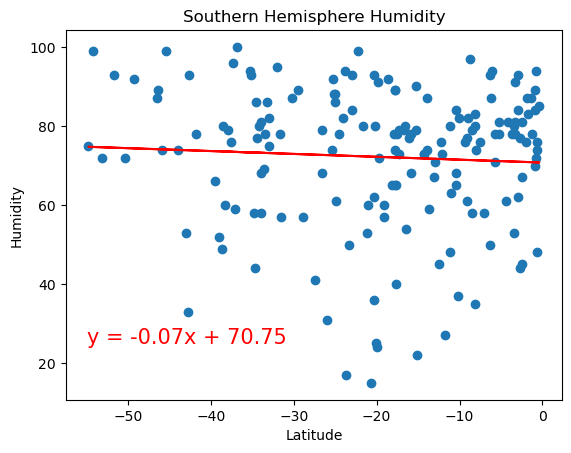

In [67]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,25,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Not a lot of relation going on here between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.012024700150660242


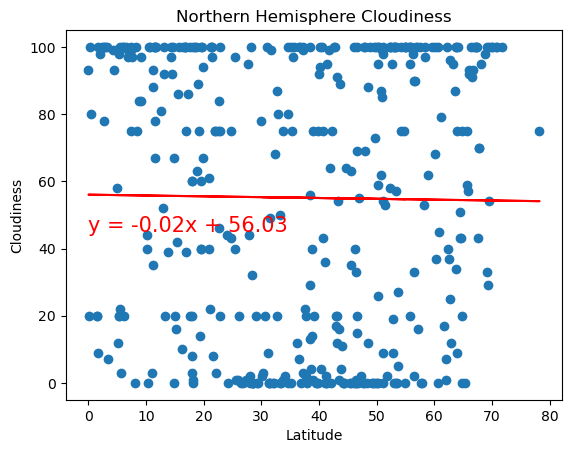

In [68]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,45,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.1123098839633858


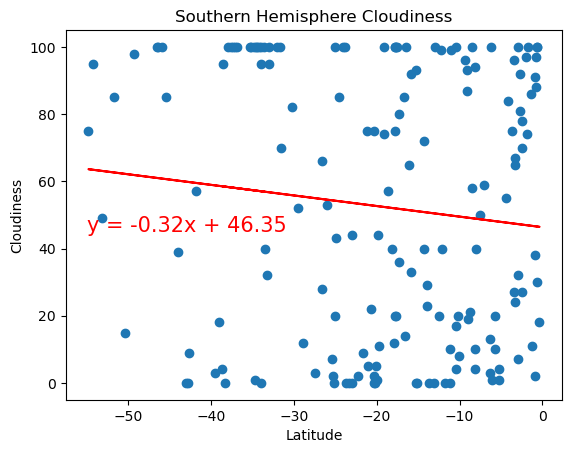

In [69]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-55,45,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Again theres next to no relation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06938418492972995


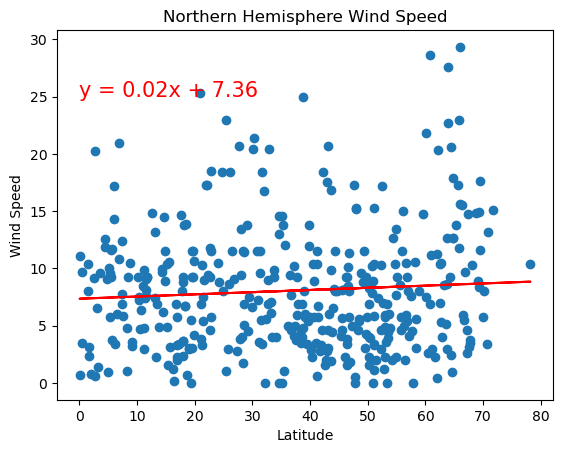

In [70]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(0,25,equation,color="r",fontsize=15) 
plt.title("Northern Hemisphere Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.025429538866666258


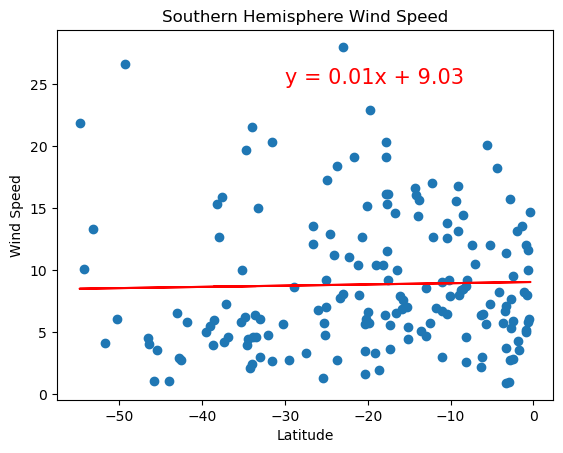

In [71]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis,y_axis)
pe_fit = pe_slope * x_axis + pe_int
equation = f"y = {round(pe_slope,2)}x + {round(pe_int,2)}"

print(f"The r-value is: {pe_r}")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(x_axis, pe_fit, color="r")
plt.text(-30,25,equation,color="r",fontsize=15) 
plt.title("Southern Hemisphere Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Very mild correlation between the wind speed and latitudes. 